# 03. Convolutional Neural Networks and Computer Vision with TensorFlow

So far we've covered the basics of TensorFlow and built a handful of models to work across different problems.

Now we're going to get specific and see how a special kind of neural network, [convolutional neural networks (CNNs)](https://en.wikipedia.org/wiki/Convolutional_neural_network) can be used for computer vision (detecting patterns in visual data).

> 🔑 **Note:** In deep learning, many different kinds of model architectures can be used for different problems. For example, you could use a convolutional neural network for making predictions on image data and/or text data. However, in practice some architectures typically work better than others.

For example, you might want to:
* Classify whether a picture of food contains pizza 🍕 or steak 🥩 (we're going to do this)
* Detect whether or not an object appears in an image (e.g. did a specific car pass through a security camera?)

In this notebook, we're going to follow the TensorFlow modelling workflow we've been following so far whilst learning about how to build and use CNNs.

## What we're going to cover

Specifically, we're going to go through the follow with TensorFlow:

- Getting a dataset to work with
- Architecture of a convolutional neural network
- A quick end-to-end example (what we're working towards)
- Steps in modelling for binary image classification with CNNs
  - Becoming one with the data
  - Preparing data for modelling
  - Creating a CNN model (starting with a baseline)
  - Fitting a model (getting it to find patterns in our data)
  - Evaluating a model
  - Improving a model
  - Making a prediction with a trained model
- Steps in modelling for multi-class image classification with CNNs
 - Same as above (but this time with a different dataset)

## How you can use this notebook

You can read through the descriptions and the code (it should all run, except for the cells which error on purpose), but there's a better option.

Write all of the code yourself.

Yes. I'm serious. Create a new notebook, and rewrite each line by yourself. Investigate it, see if you can break it, why does it break?

You don't have to write the text descriptions but writing the code yourself is a great way to get hands-on experience.

Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to **write more code**.

## Get the data

Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the [Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

> 🔑 **Note:** To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out [the preprocessing notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb).

We'll download the `pizza_steak` subset .zip file and unzip it.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import zipfile

# # Downloading zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile('pizza_steak.zip')
# zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/')
# zip_ref.close()

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

Wtih this being said, let's inspect the data we just downloaded.

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically:
* A `train` directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
* A `test` directory with the same structure as the `train` directory.

```
Example of file structure

pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...    
 ```

Let's inspect each of the directories we've downloaded.

To so do, we can use the command `ls` which stands for list.

In [3]:
# !ls "/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak"

In [4]:
!ls "/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/test/pizza/"

1001116.jpg  1459760.jpg  2082495.jpg  254812.jpg   328965.jpg	 3785667.jpg  625434.jpg
1032754.jpg  1475479.jpg  2101820.jpg  2549661.jpg  3296507.jpg  3793004.jpg  645087.jpg
103708.jpg   1484836.jpg  2111981.jpg  2572488.jpg  3296907.jpg  380739.jpg   648055.jpg
1060407.jpg  148765.jpg   2124579.jpg  2582289.jpg  3316410.jpg  3814200.jpg  65128.jpg
106507.jpg   1503858.jpg  212995.jpg   2583389.jpg  331644.jpg	 3827990.jpg  666569.jpg
1067986.jpg  1506213.jpg  2157510.jpg  2605853.jpg  335474.jpg	 3898047.jpg  678708.jpg
1106738.jpg  1507019.jpg  2161321.jpg  2615100.jpg  3375083.jpg  3913440.jpg  714866.jpg
1119571.jpg  1512557.jpg  2165223.jpg  2619955.jpg  3376617.jpg  3919151.jpg  723745.jpg
11297.jpg    153195.jpg   2195935.jpg  2631321.jpg  3385460.jpg  395662.jpg   724290.jpg
1152100.jpg  1555015.jpg  2203687.jpg  2719697.jpg  3392194.jpg  397910.jpg   728260.jpg
1179703.jpg  1594097.jpg  2218680.jpg  2782998.jpg  341377.jpg	 398345.jpg   729262.jpg
1180001.jpg  1618659.jpg  

In [5]:
import os

#walking throught pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak"):
  print(f"There are {len(dirnames)} files and {len(filenames)} images in '{dirpath}'.")


There are 2 files and 0 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak'.
There are 2 files and 0 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/test'.
There are 0 files and 250 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/test/steak'.
There are 0 files and 250 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/test/pizza'.
There are 2 files and 0 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/train'.
There are 0 files and 750 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural

In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/train/steak"))

num_steak_images_train

750

Okay, so we've got a collection of 750 training images and 250 testing images of pizza and steak.

Let's look at some.

> 🤔 **Note:** Whenever you're working with data, it's always good to visualize it as much as possible. Treat your first couple of steps of a project as becoming one with the data. **Visualize, visualize, visualize.**

In [7]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


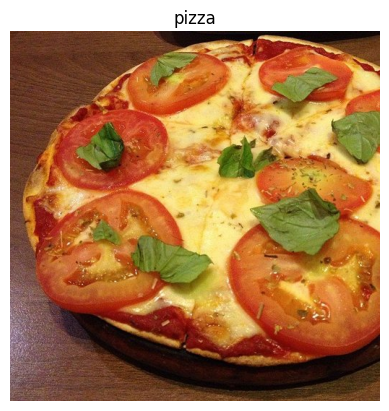

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/train/",
                        target_class="pizza")

In [10]:
import tensorflow as tf
img.shape

(512, 512, 3)

Looking at the image shape more closely, you'll see it's in the form `(Width, Height, Colour Channels)`.

In our case, the width and height vary but because we're dealing with colour images, the colour channels value is always 3. This is for different values of [red, green and blue (RGB) pixels](https://en.wikipedia.org/wiki/RGB_color_model).

You'll notice all of the values in the `img` array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value `red=0, green=0, blue=255` will look very blue.

So when we build a model to differentiate between our images of `pizza` and `steak`, it will be finding patterns in these different pixel values which determine what each class looks like.

> 🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255.

## A (typical) architecture of a convolutional neural network

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.


Components of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

How they stack together:

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)
*A simple example of how you might stack together the above layers into a convolutional neural network. Note the convolutional and pooling layers can often be arranged and rearranged into many different formations.*

Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/train/"
test_dir =  "/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
len(valid_data)

16

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/train/"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [14]:
# Building a CNN model
import tf_keras as keras
model1 = keras.models.Sequential([
  keras.layers.Input(shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu"),
  keras.layers.Conv2D(10, 3, activation="relu"),
  keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  keras.layers.Conv2D(10, 3, activation="relu"),
  keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == keras.layers.Activations(tf.nn.relu)
  keras.layers.MaxPool2D(2),
  keras.layers.Flatten(),
  keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

model1.compile(
    loss= keras.losses.binary_crossentropy,
    optimizer= keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Train the model
mod_1 = model1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 24s 337ms/step - loss: 0.6265 - accuracy: 0.6253 - val_loss: 0.4134 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 13s 282ms/step - loss: 0.4440 - accuracy: 0.7927 - val_loss: 0.3751 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 13s 291ms/step - loss: 0.3898 - accuracy: 0.8333 - val_loss: 0.2914 - val_accuracy: 0.9020
Epoch 4/5
47/47 [==============================] - 18s 379ms/step - loss: 0.3574 - accuracy: 0.8527 - val_loss: 0.3109 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 12s 252ms/step - loss: 0.3199 - accuracy: 0.8713 - val_loss: 0.2871 - val_accuracy: 0.8660


In [15]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [16]:
len(train_data )

47

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.

In [17]:
#batch
1500/32

46.875

What do you notice about the names of `model_1`'s layers and the layer names at the top of the [CNN explainer website](https://poloclub.github.io/cnn-explainer/)?

I'll let you in on a little secret: we've replicated the exact architecture they use for their model demo.

Look at you go! **You're already starting to replicate models you find in the wild.**

Now there are a few new things here we haven't discussed, namely:
* The [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class and the `rescale` parameter
* The [`flow_from_directory()`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory) method
  * The `batch_size` parameter
  * The `target_size` parameter
* [`Conv2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) layers (and the parameters which come with them)
* [`MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers (and their parameters).
* The `steps_per_epoch` and `validation_steps` parameters in the `fit()` function

Before we dive into each of these, let's see what happens if we try to fit a model we've worked with previously to our data.
|

## Using the same model as before

To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

> 🔑 **Note:** If you haven't gone through the previous classification notebook, no troubles, we'll be bringing in the a simple 4 layer architecture used to separate dots replicated from the [TensorFlow Playground environment](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.75075&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

We can use all of the same parameters in our previous model except for changing two things:
* **The data** - we're now working with images instead of dots.
* **The input shape** - we have to tell our neural network the shape of the images we're working with.
  * A common practice is to reshape images all to one size. In our case, we'll resize the images to `(224, 224, 3)`, meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [18]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model2 = keras.Sequential([
  keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  keras.layers.Dense(4, activation='relu'),
  keras.layers.Dense(4, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model2.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
mod_2 = model2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 276ms/step - loss: 0.7560 - accuracy: 0.5073 - val_loss: 0.6935 - val_accuracy: 0.4980
Epoch 2/5
47/47 [==============================] - 13s 286ms/step - loss: 0.6938 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.4880
Epoch 3/5
47/47 [==============================] - 13s 279ms/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6931 - val_accuracy: 0.5180
Epoch 4/5
47/47 [==============================] - 13s 276ms/step - loss: 0.6932 - accuracy: 0.4913 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 5/5
47/47 [==============================] - 11s 233ms/step - loss: 0.6931 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.4780


In [19]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [20]:
tf.random.set_seed(42)

model3=keras.Sequential([
    keras.layers.Flatten(input_shape=(224,224,3)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

# Complile the model
model3.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

mod_3 = model3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 17s 315ms/step - loss: 2.5847 - accuracy: 0.6213 - val_loss: 0.4667 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 14s 295ms/step - loss: 0.6938 - accuracy: 0.7187 - val_loss: 0.4961 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 12s 265ms/step - loss: 0.6758 - accuracy: 0.7147 - val_loss: 0.4541 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 12s 268ms/step - loss: 0.8811 - accuracy: 0.6980 - val_loss: 0.4941 - val_accuracy: 0.7500
Epoch 5/5
47/47 [==============================] - 11s 232ms/step - loss: 0.5355 - accuracy: 0.7633 - val_loss: 0.4664 - val_accuracy: 0.7720


In [21]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
15000000/31000

483.8709677419355

## Binary Classification: A Step-by-Step Guide

1. **Understand Your Data**: Look at your data carefully. Visualize it to see patterns and trends.
2. **Prepare Your Data**: Clean and preprocess your data. This includes scaling or normalizing the data and organizing it into batches.
3. **Build a Model**: Start with a simple model as a baseline.
4. **Train Your Model**: Use your data to train the model.
5. **Check Your Model**: Evaluate how well your model performs.
6. **Improve Your Model**: Adjust the model's parameters to make it better than your baseline.
7. **Keep Trying**: Keep experimenting until you are happy with your model's performance.

### 1.

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


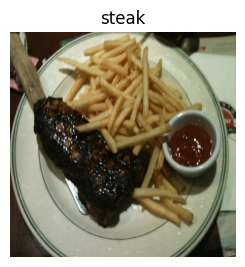

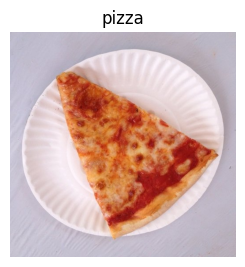

In [23]:
# Visualize our data
plt.figure()
plt.subplot(1,2,1)
stear_img = view_random_image("/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/train/", "steak")
plt.figure()
plt.subplot(1,2,1)
pizza_img = view_random_image("/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/train/", "pizza")

### 2. Preprocess

In [24]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/train/"
test_dir =  "/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Instead of processing all ~10,000 images at once, a model might only look at 32 at a time. This is done for a couple of reasons:

1. **Memory Efficiency**: 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. **Learning Efficiency**: Trying to learn patterns in 10,000 images in one go could result in the model not being able to learn very well.

Why 32?

Because 32 is a commonly used batch size that balances memory usage and learning efficiency. It is a power of 2, which is beneficial for GPU memory allocation and processing. This size is also small enough to fit into memory but large enough to provide a good representation of the data for learning.

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

**Preparing Images for Our Model**

Imagine you have a big collection of images that you want to use to train a machine learning model. But, before you can use them, you need to get them ready. That's where the `ImageDataGenerator` class comes in.

**What is `ImageDataGenerator`?**

`ImageDataGenerator` is a tool that helps us prepare our images for our model. It does two main things:

1. **Batches**: It groups our images into batches, which makes it easier for our model to process them.
2. **Transformations**: It allows us to make changes to our images as they're loaded into the model.

**What's the `rescale` parameter?**

You might have noticed that we used a `rescale` parameter when creating our `ImageDataGenerator` instances. This is an example of a transformation.

Remember when we imported an image earlier and its pixel values were between 0 and 255? The `rescale` parameter helps us change those values.

When we use `rescale=1/255.`, we're essentially saying: "Take all the pixel values and divide them by 255." This helps us normalize our images, which means we convert their pixel values to be between 0 and 1.

**Why do we need to normalize our images?**

Normalizing our images helps our model learn better. It's like giving our model a common language to understand all the images.

**More Transformation Options**

If you want to do more cool things with your images, like flip them or rotate them, you can use other transformation options. Check out the `ImageDataGenerator` documentation for more information.

**Loading Images from Directories**

Now that we have our `ImageDataGenerator` instances, we can use them to load our images from their respective directories. We can do this using the `flow_from_directory` method.

In [26]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directoy of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
# Get a sample of the training data batch
images, labels = next(train_data) # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [28]:
len(train_data)

47

In [29]:
images[:2],images[0].shape

(array([[[[0.3529412 , 0.19215688, 0.07450981],
          [0.34901962, 0.18823531, 0.07058824],
          [0.34117648, 0.18039216, 0.0627451 ],
          ...,
          [0.15294118, 0.07843138, 0.01960784],
          [0.16078432, 0.08627451, 0.02745098],
          [0.16078432, 0.08627451, 0.02745098]],
 
         [[0.33333334, 0.18039216, 0.05882353],
          [0.3254902 , 0.17254902, 0.0509804 ],
          [0.34117648, 0.18823531, 0.06666667],
          ...,
          [0.15686275, 0.08235294, 0.02352941],
          [0.16078432, 0.08627451, 0.02745098],
          [0.16470589, 0.09019608, 0.03137255]],
 
         [[0.3529412 , 0.21176472, 0.08627451],
          [0.34509805, 0.20392159, 0.07843138],
          [0.32941177, 0.18823531, 0.0627451 ],
          ...,
          [0.15686275, 0.08235294, 0.02352941],
          [0.16078432, 0.08627451, 0.02745098],
          [0.1764706 , 0.10196079, 0.04313726]],
 
         ...,
 
         [[0.34509805, 0.23529413, 0.14117648],
          [0.34117

In [30]:
# View the first batch of labels
len(labels)

32

In [31]:
labels

array([0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.],
      dtype=float32)

# Creating a Model: A Beginner's Guide

Now that we have our data ready, it's time to create a model that can learn from it.

**What Model Should I Use?**

You might be wondering what kind of model you should use for your computer vision task. The truth is, there are many possible answers to this question.

**A Simple Heuristic**

One way to approach this is to look at what's working well on a large collection of images called ImageNet. ImageNet is like a benchmark for computer vision models, and it can give us an idea of what kinds of models are performing well.

**But Let's Start Small**

However, instead of trying to build a super complex model right from the start, let's build a smaller model to get a baseline result. This will give us something to compare our future models to.

**What's a Smaller Model?**

In deep learning, a smaller model usually means a model with fewer layers. For example, a smaller model might have 3-4 layers, while a state-of-the-art model like ResNet50 might have 50+ layers.

**Our Model**

Let's take a simple 3-layer convolutional neural network (CNN) as our starting point. This model is inspired by the one on the CNN explainer website.

Here's a simple way to think about it:

* Layer 1: Look for edges in the image
* Layer 2: Look for shapes in the image
* Layer 3: Make a decision based on what we've seen

This is a very basic model, but it's a good starting point. We can always add more layers or complexity later if we need to.

**Next Steps**

Now that we have our model, we can start training it on our data. We'll see how well it performs and then try to improve it.

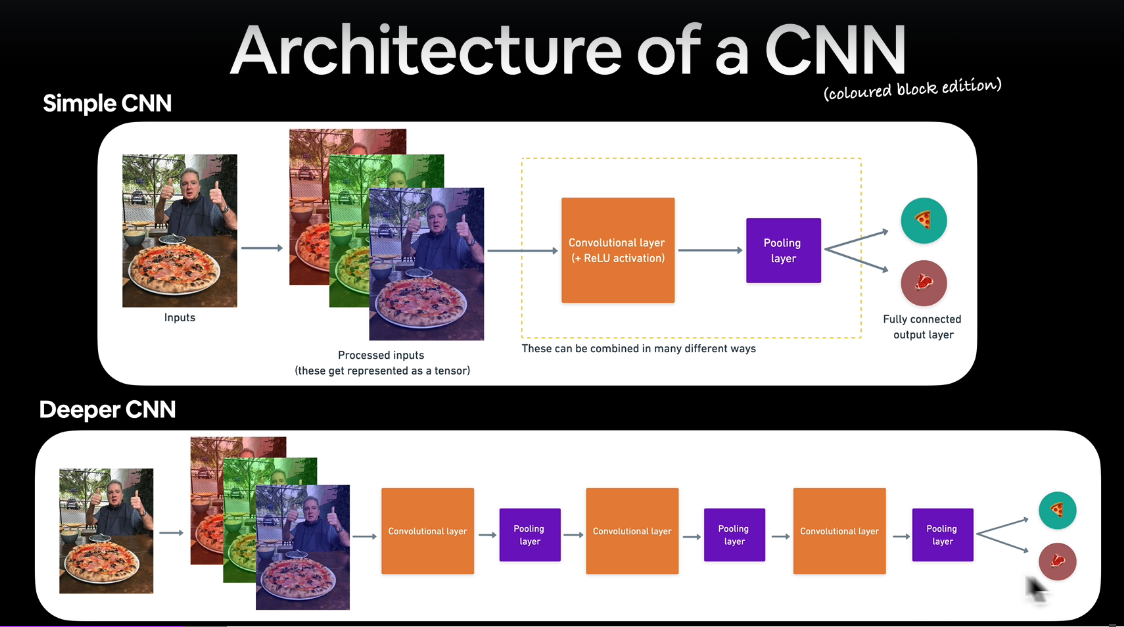

## 1.Defining model

In [32]:
# Make the creating of our model a little easier
import tf_keras as keras
from tf_keras.optimizers import Adam
from tf_keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tf_keras import Sequential

In [33]:
# Creating the model. [1 layer CNN]
model4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

## 2.Compiling model

In [34]:
model4.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ["accuracy"]
)

In [35]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3.Fit

## 4.Evaluate
It looks like our model is learning something, let's evaluate it.

In [36]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [37]:
mod_4= model4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 17s 316ms/step - loss: 0.8557 - accuracy: 0.7040 - val_loss: 0.3830 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 14s 298ms/step - loss: 0.3954 - accuracy: 0.8300 - val_loss: 0.3835 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 13s 288ms/step - loss: 0.2949 - accuracy: 0.8887 - val_loss: 0.4500 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 18s 383ms/step - loss: 0.1211 - accuracy: 0.9620 - val_loss: 0.5492 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 16s 356ms/step - loss: 0.0403 - accuracy: 0.9907 - val_loss: 0.5770 - val_accuracy: 0.7880


## 5. Evaluating our model

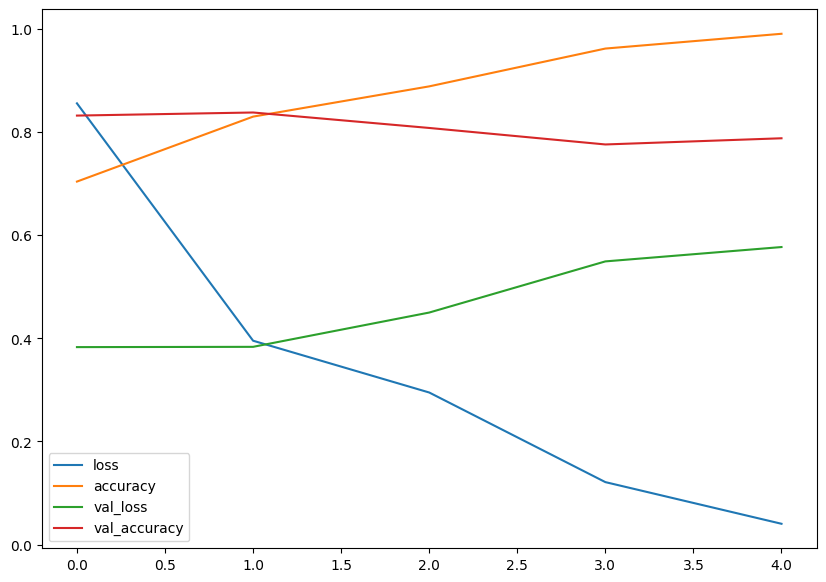

In [38]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(mod_4.history).plot(figsize=(10,7));

In [39]:
# Plot the validation and training curves separately
# where mod is the history [history = mod]
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

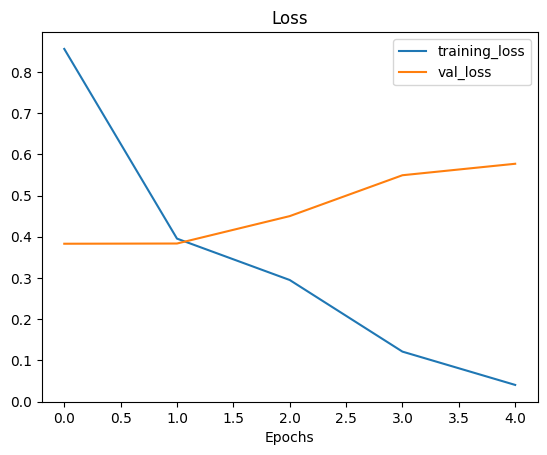

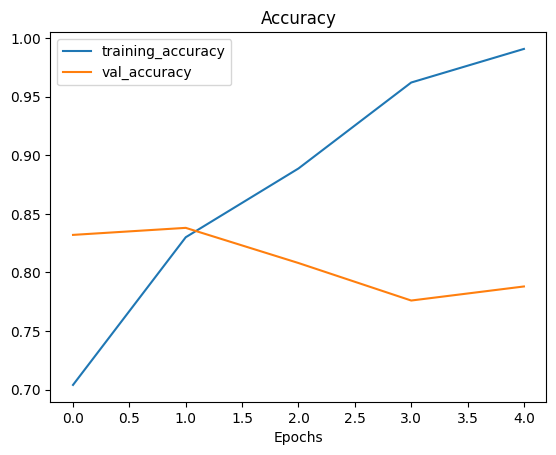

In [40]:
plot_loss_curves(mod_4)

**Adjusting Model Parameters**

When training a machine learning model, we follow three main steps:

**Step 1: Create a Baseline**
---------------------------

* Create a simple model and see how well it performs.

**Step 2: Beat the Baseline by Overfitting a Larger Model**
---------------------------------------------------------

* Try to make our model better by adding more layers or making the existing layers more complex.
* This can make our model too good at fitting the training data, but not good at generalizing to new data.

**Ways to Induce Overfitting**
-----------------------------

* **Add more convolutional layers**
	+ Make our model too good at recognizing patterns in the training data.
* **Increase the number of convolutional filters**
	+ Make our model too good at recognizing patterns in the training data.
* **Add another dense layer**
	+ Make our model too good at making predictions based on the training data.

**Ways to Reduce Overfitting (Regularization)**
---------------------------------------------

* **Add data augmentation**
	+ Add more data to our training set by rotating, flipping, or cropping the existing images.
* **Add regularization layers**
	+ Add layers that help our model generalize better to new data. Examples include MaxPool2D layers.
* **Add more data**
	+ Collect more images to add to our training set.

**Remember: Reducing Overfitting is also known as Regularization**
---------------------------------------------------------------

It's an important step in training a machine learning model.

In [41]:
model5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [42]:
model5.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"]
               )

In [43]:
mod_5=model5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 283ms/step - loss: 0.6170 - accuracy: 0.6673 - val_loss: 0.4874 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 13s 275ms/step - loss: 0.4665 - accuracy: 0.7887 - val_loss: 0.3687 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 13s 286ms/step - loss: 0.4151 - accuracy: 0.8227 - val_loss: 0.3866 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 11s 249ms/step - loss: 0.4024 - accuracy: 0.8247 - val_loss: 0.3752 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 12s 252ms/step - loss: 0.3676 - accuracy: 0.8393 - val_loss: 0.3102 - val_accuracy: 0.8560


In [44]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

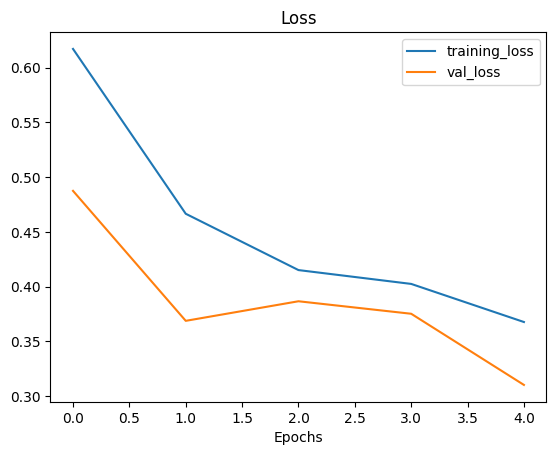

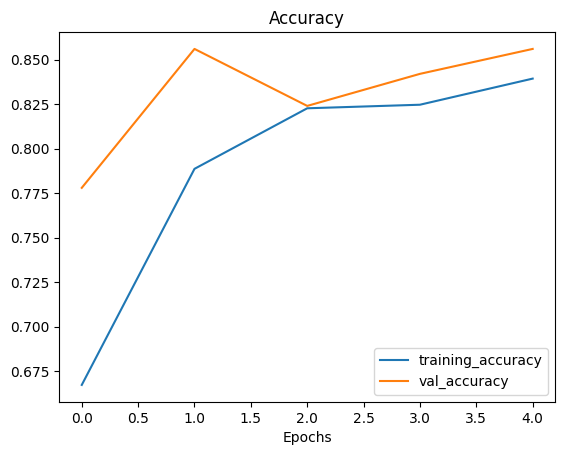

In [45]:
# Plot loss curves of model_5 results
plot_loss_curves(mod_5)

### Data augumentation

In [46]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [47]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')


Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [48]:
# Get data batch samples
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented) # Note: labels aren't augmented, they stay the same

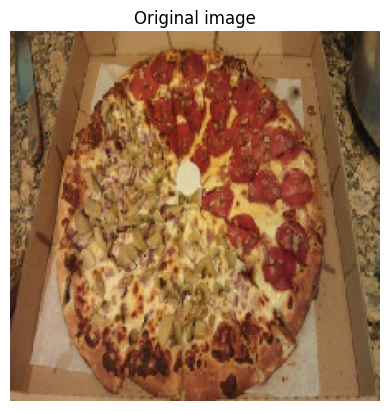

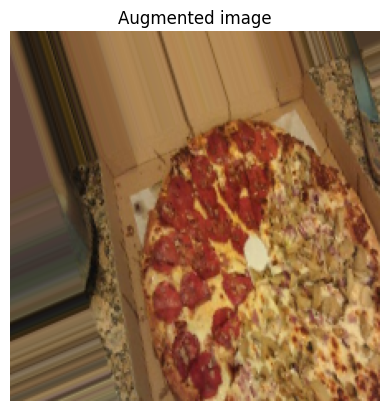

In [49]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [51]:
# Create the model (same as model_5)
model6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
mod_6 = model6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 37s 771ms/step - loss: 2.2130 - accuracy: 0.6473 - val_loss: 0.7576 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 31s 666ms/step - loss: 0.8085 - accuracy: 0.4993 - val_loss: 4.7612 - val_accuracy: 0.5180
Epoch 3/5
47/47 [==============================] - 30s 657ms/step - loss: 1.3024 - accuracy: 0.4487 - val_loss: 0.7296 - val_accuracy: 0.5020
Epoch 4/5
47/47 [==============================] - 29s 631ms/step - loss: 0.7302 - accuracy: 0.1827 - val_loss: 0.6935 - val_accuracy: 0.4920
Epoch 5/5
47/47 [==============================] - 29s 621ms/step - loss: 0.6950 - accuracy: 0.4267 - val_loss: 0.6933 - val_accuracy: 0.5120


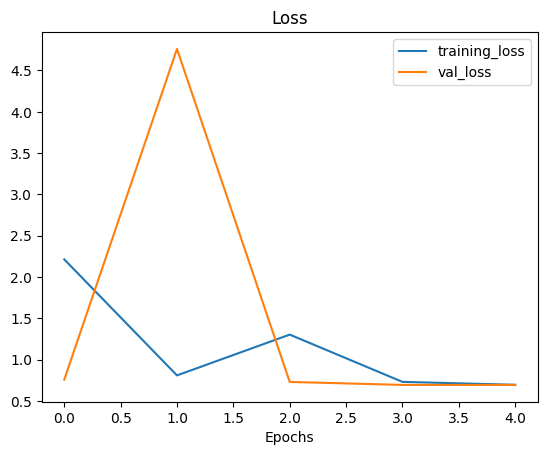

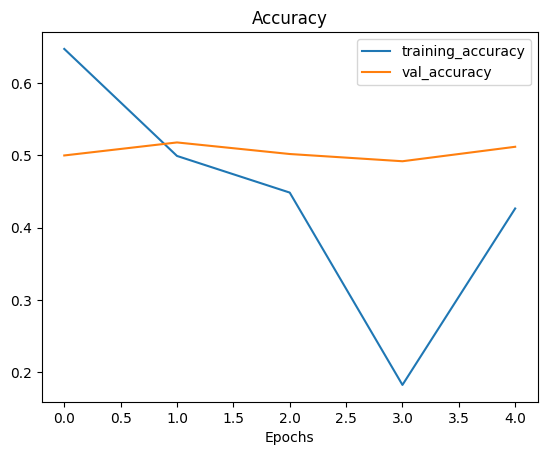

In [52]:
# Check model's performance history training on augmented data
plot_loss_curves(mod_6)

In [53]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                             target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [54]:
# Create the model (same as model_5 and model_6)
model7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# steps_per_epoch = len(train_data_augmented_shuffled)
#validation_steps = len(test_data)


# # Calculate steps per epoch
# steps_per_epoch = train_data.samples // train_data.batch_size
# validation_steps = valid_data.samples // valid_data.batch_size

# Fit the model
# mod_7 = model7.fit(train_data_augmented, # changed to augmented training data
#                     epochs=5,
#                     steps_per_epoch=train_data_augmented.samples // train_data_augmented.batch_size,
#                     validation_data=test_data,
#                     validation_steps=test_data.samples // test_data.batch_size)
mod_7 = model7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 33s 686ms/step - loss: 0.6612 - accuracy: 0.5853 - val_loss: 0.6057 - val_accuracy: 0.6700
Epoch 2/5
47/47 [==============================] - 31s 663ms/step - loss: 0.5409 - accuracy: 0.7353 - val_loss: 0.3739 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 29s 637ms/step - loss: 0.5000 - accuracy: 0.7600 - val_loss: 0.3780 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 29s 623ms/step - loss: 0.4655 - accuracy: 0.7733 - val_loss: 0.3327 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 27s 594ms/step - loss: 0.4531 - accuracy: 0.8007 - val_loss: 0.3471 - val_accuracy: 0.8680


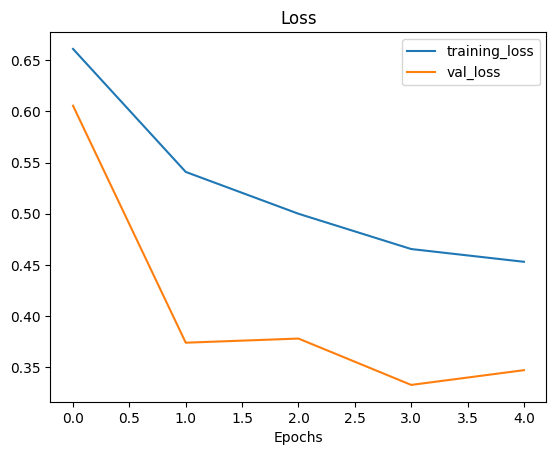

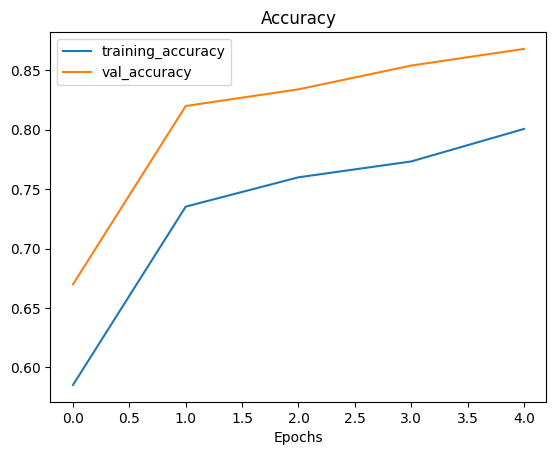

In [55]:
# Check model's performance history training on augmented data
plot_loss_curves(mod_7)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to contine to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

> 🛠 **Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

### 7. Repeat until satisified

We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as **hyperparameter tuning**.

You can think of hyperparameter tuning as simialr to adjusting the settings on your oven to cook your favourite dish. Although your oven does most of the cooking for you, you can help it by tweaking the dials.

Let's go back to right where we started and try our original model (`model_1` or the TinyVGG architecture from [CNN explainer](https://poloclub.github.io/cnn-explainer/)).


In [ ]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
mod_8 = model8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 34s 690ms/step - loss: 0.6463 - accuracy: 0.6047 - val_loss: 0.4868 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 41s 880ms/step - loss: 0.5003 - accuracy: 0.7460 - val_loss: 0.4339 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 38s 828ms/step - loss: 0.5098 - accuracy: 0.7707 - val_loss: 0.4221 - val_accuracy: 0.8180
Epoch 4/5
17/47 [=========>....................] - ETA: 12s - loss: 0.5366 - accuracy: 0.7463

In [ ]:
# Check model_1 architecture (same as model_8)
model1.summary()

In [ ]:
# Check model_8 architecture (same as model_1)
model8.summary()

Now let's check out our TinyVGG model's performance.

In [ ]:
# Check out the TinyVGG model performance
plot_loss_curves(mod_8)

## Making a prediction with our trained model on our own custom data

--2024-08-27 05:16:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.3’

03-steak.jpeg.3     100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2024-08-27 05:16:06 (72.8 MB/s) - ‘03-steak.jpeg.3’ saved [1978213/1978213]



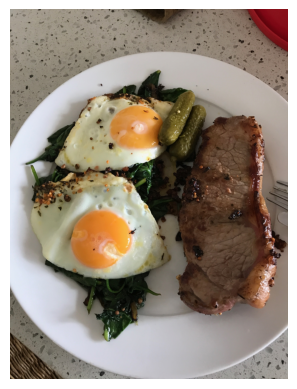

In [56]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [57]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [58]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [59]:
pred = model7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 318ms/step


array([[0.9062086]], dtype=float32)

In [60]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 20ms/step


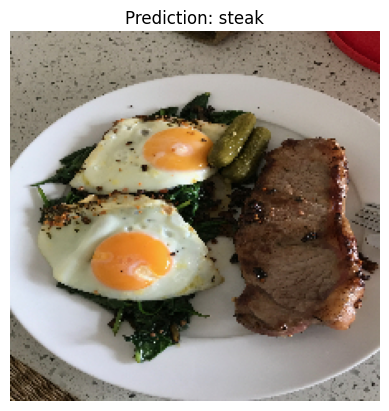

In [62]:
# Test our model on a custom image
pred_and_plot(model7, "03-steak.jpeg")

Nice! Our model got the prediction right.

The only downside of working with food is that you get hungry.

Let's try one more image.